# Control de errores, pruebas y validación de datos

## Autor: Victor Simo Lozano

## Actividad 1
En base al documento finanzas2020[1].csv contestar a las siguientes actividades

#### APARTADO 1:
Leyendo el fichero mencionado, contestar a las siguientes preguntas del mismo:
- ¿Qué mes se ha gastado más?
- ¿Qué mes se ha ahorrado más?
- ¿Cuál es la media de gastos al año?
- ¿Cuál ha sido el gasto total a lo largo del año?
- ¿Cuáles han sido los ingresos totales a lo largo del año?
- Opcional: Realice una gráfica de la evolución de ingresos a lo largo del año


<h4> SOLUCION 

<h6>1 -</h6>
Importamos las librerias necesarias para el desarrollo de la práctica

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h6> 2 -</h6> 
Lectura del fichero y almacenado en variable df

In [2]:
df = pd.read_csv('data/finanzas2020[1].csv',sep='\t')
df

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-760,343,265,-624,-390,-796,601,-780,-491,645,-248,714
1,223,491,-397,-123,6,-115,157,-741,-951,267,14,-596
2,-872,-913,558,278,544,-223,607,-113,348,576,-977,195
3,111,-842,730,-761,158,-963,-290,-669,191,130,170,-274
4,919,111,-688,15,395,9,553,297,-302,695,730,-731
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-652,233,-65,431,-593,-72,-140,-159,-581,771,191,313
96,777,-905,-405,110,-444,-978,-285,-346,207,-363,696,-971
97,-380,946,-790,9,-59,-743,-296,321,-767,944,-116,-873
98,244,-44,-271,462,-55,-699,674,-203,-792,-848,263,-378


<p style="font-size:12px"><i>El dataframe contiene 100 filas, es decir 100 registros de datos, y 12 columnas, es decir una por cada mes del año</i></p>

<h6> 3 -</h6> 
Crear dataframe auxiliares para saber ahorros, gastos...

In [3]:
# Diccionario de listas para almacenar los datos de cada mes
dictMeses= dict(
                mes=[],
                gasto=[],
                ingreso=[],
                ahorro=[]
            )

for col in df:
    gasto = 0
    ingreso = 0
    ahorro = 0
    # Rellenar la lista con el nombre del mes
    dictMeses['mes'].append(col)    
    
    # Convertir valores a numero sustituyendo los NaN encontrados por 0
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(int(0))  
    
    # Recorrer las filas del mes e ir sumando los valores
    for i in range(len(df)):
        valor = df.loc[i, col]
        # Almacenar los valores negativos, es decir, son un gasto
        if valor < 0:
            valor *= -1
            gasto += valor
        # Almacenar los valores positivos, es decir, son un ingreso
        elif valor > 0:
            ingreso += valor
            
    gasto = int(gasto)
    ingreso = int(ingreso)
    ahorro = ingreso - gasto
    # Añadir datos al mes en bucle
    dictMeses['gasto'].append(gasto)
    dictMeses['ingreso'].append(ingreso)
    dictMeses['ahorro'].append(ahorro)
    
    
# Convertir a Dataframe el diccionario creado
dfMeses = pd.DataFrame(dictMeses)

dfMeses

,mes,gasto,ingreso,ahorro
0,Enero,17621,29685,12064
1,Febrero,24398,24437,39
2,Marzo,29690,21721,-7969
3,Abril,34133,15200,-18933
4,Mayo,17200,27504,10304
5,Junio,24197,22720,-1477
6,Julio,18390,26690,8300
7,Agosto,29013,20278,-8735
8,Septiembre,29151,18203,-10948
9,Octubre,22957,26369,3412


<p style="font-size:12px"><i>En este dataframe se muestra los datos de gasto, ingreso y ahorro para cada uno de los meses</i></p>

<h6> 4 -</h6> 
Responder a las preguntas

In [4]:
# Meses ordenados por gasto
dfMeses = dfMeses.sort_values(by = 'gasto', ascending = False)
mayorGasto = dfMeses.iloc[0]['mes']

print(f'El mes con mayor gasto se trata de: {mayorGasto}')
dfMeses

El mes con mayor gasto se trata de: Abril


,mes,gasto,ingreso,ahorro
3,Abril,34133,15200,-18933
2,Marzo,29690,21721,-7969
8,Septiembre,29151,18203,-10948
7,Agosto,29013,20278,-8735
11,Diciembre,25861,22817,-3044
1,Febrero,24398,24437,39
5,Junio,24197,22720,-1477
10,Noviembre,24180,25337,1157
9,Octubre,22957,26369,3412
6,Julio,18390,26690,8300


In [5]:
dfMeses = dfMeses.sort_index()

In [6]:
# Meses ordenador por ahorro
dfMeses = dfMeses.sort_values(by = 'ahorro', ascending = False)
mayorAhorro = dfMeses.iloc[0]['mes']

print(f'El mes con mayor ahorro se trata de: {mayorAhorro}')
dfMeses[['mes','ahorro']]

El mes con mayor ahorro se trata de: Enero


,mes,ahorro
0,Enero,12064
4,Mayo,10304
6,Julio,8300
9,Octubre,3412
10,Noviembre,1157
1,Febrero,39
5,Junio,-1477
11,Diciembre,-3044
2,Marzo,-7969
7,Agosto,-8735


In [7]:
dfMeses = dfMeses.sort_index()

In [8]:
mediaGasto = dfMeses['gasto'].mean()
gastoTotal = dfMeses['gasto'].sum()

print(f'La media de gasto para 2020 ha sido de: {mediaGasto:0.2f}')
print(f'El gasto total para 2020 ha sido de: {int(gastoTotal)}')
dfMeses[['mes','gasto']]

La media de gasto para 2020 ha sido de: 24732.58
El gasto total para 2020 ha sido de: 296791


,mes,gasto
0,Enero,17621
1,Febrero,24398
2,Marzo,29690
3,Abril,34133
4,Mayo,17200
5,Junio,24197
6,Julio,18390
7,Agosto,29013
8,Septiembre,29151
9,Octubre,22957


In [9]:
ingresoTotal = dfMeses['ingreso'].sum()

print(f'El ingreso total para 2020 ha sido de: {int(ingresoTotal)}')
dfMeses[['mes','ingreso']]

El ingreso total para 2020 ha sido de: 280961


,mes,ingreso
0,Enero,29685
1,Febrero,24437
2,Marzo,21721
3,Abril,15200
4,Mayo,27504
5,Junio,22720
6,Julio,26690
7,Agosto,20278
8,Septiembre,18203
9,Octubre,26369


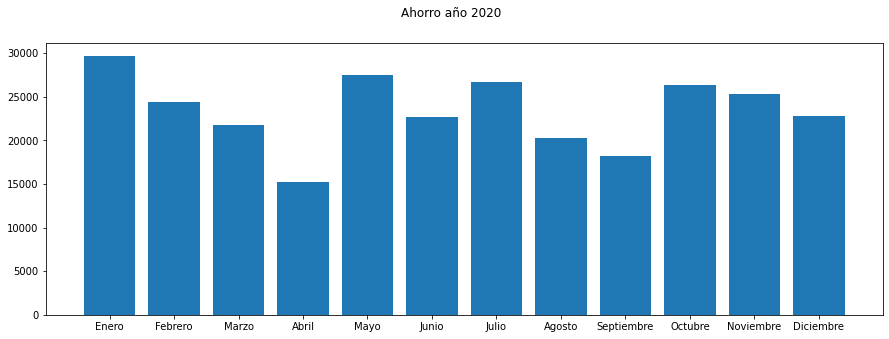

In [10]:
# Definicion del set de datos a plotear
x = dfMeses['mes']
y = dfMeses['ingreso']

plt.figure(figsize=(15, 5))

plt.bar(x, y)

plt.suptitle('Ahorro año 2020')

# Guardar gráfico y mostrar
plt.savefig('media/Ahorro anual 2020.png', bbox_inches='tight')
plt.show()

#### APARTADO 2:
En base al fichero mencionado, hacer uso de excepciones para el analisis de datos:
-  Compruebe que el fichero existe y que tiene 12 columnas, una para cada mes del año.
- Para cada mes compruebe que hay contenido.
- Compruebe que todos los datos son correctos. De no haber un dato correcto, el programa debe saber actuar en consecuencia y continuar con su ejecución.


<h4> SOLUCION 

<h6> 1 - Comprobacion de existencia de fichero y longitud del mismo</h6> 

Mediante el uso de la excepcion de Python IOError, se controlara el error en el caso de que el fichero al que queramos acceder no exista. Ademas, se importa de una clase creada la gestion del error para una longitud de documento inferior al numero de meses.

In [11]:
# DataLength: Control de longitud de archivo
from Excepciones import DataLength

In [12]:
# Variable para gestionar el error de lectura del archivo
CSV_ROOT = 'data/finanzas2020[2].csv'

# Control en bucle hasta la correcta lectura del fichero deseado.
while True:
    try:
        # Probamos a generar el dataframe con el archivo segun nuestra variable
        df2 = pd.read_csv(CSV_ROOT ,sep='\t')
        # Si es satisfactoria la creacion del dataframe, lo mostramos por pantalla y salimos del bucle
        print('\nFichero encontrado satisfactoriamente.')
        break
    except IOError:
        # Control de error nativo de Python, aqui su uso es dado que ha existido un error en la lectura del archivo que
        # deseamos abrir.
        print(f'\nError en la lectura del archivo. Asegurese de que existe en la ruta "{CSV_ROOT}" o ' 
              f'introduzca una nueva ruta.')
        # Permitimos al usuario decicir si hacer un check de la ruta o bien indicar una nueva ruta del fichero.
        choice = input('¿Desea indicar una nueva ruta? Yes[Y]/No[N]: ')
        if choice.upper() == 'Y':
            CSV_ROOT = input('Nueva ruta: ')
        


Fichero encontrado satisfactoriamente.


<p style="font-size:12px"><i>Hasta ahora se ha podidio controlar la existencia o no del archivo deseado.</i></p>

In [13]:
# Comprobacion del tamaño del dataframe
try:
    # Comprobar si el numero de columnas es igual a 12
    if not len(list(df2)) == 12:
        raise DataLength
        df2 = ''
    else:
        print('Dataframe generado con exito. Sus columnas son correctas')
        display(df2)
        
except DataLength as e:
    print(e)


Dataframe generado con exito. Sus columnas son correctas


,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-760,343,265,-624,-390,-796,601,-780,-491,645,-248,NaN
1,223,491,-397,-123,6,-115,157,-741,-951,267,14,NaN
2,-872,-913,558,278,544,-223,607,-113,348,576,-977,NaN
3,111,-842,730,-761,158,-963,-290,-669,191,130,170,NaN
4,919,111,-688,15,395,9,553,297,-302,695,730,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-652,233,-65,431,-593,-72,-140,-159,-581,771,191,NaN
96,777,-905,-405,110,-444,-978,-285,-346,207,-363,696,NaN
97,-380,946,-790,9,-59,-743,-296,321,-767,944,-116,NaN
98,244,-44,-271,462,-55,-699,674,-203,-792,-848,263,NaN


<p style="font-size:12px"><i>Por ultimo, tras comprobar el numero de columnas del dataframe, si este es valido, se imprime el mismo y se continua.</i></p>

<h6> 2 - Comprobar que hay contenido en cada una de las columnas.</h6> 

<p>Se recorrera cada una de las columnas del dataframe comprobando mediante el metodo "empty" si la columna esta vacia. Para ello, se hace uso de una nueva clase de error creada.</p>
<p><i><b>Nota:</b> Para hacer uso de empty y es necesario añadirle el metodo "dropna()" de modo que no se cuente estos como dato, sino, no obtendriamos True para el mes sin datos.</i></p>

In [14]:
# MonthEmpty: Control de columna mes vacia
from Excepciones import MonthEmpty

In [15]:
# Recorrer los meses/columnas del dataframe    
for col in df2:
    values = pd.Series(df2[col])
    try:
        # Si esta sin datos la columna, levantamos la excepcion con argumento el nombre de la columna
        if values.dropna().empty:
            print('Aviso: ')
            raise MonthEmpty(col)
    except MonthEmpty as e:
        print(e)


Aviso: 
El mes de Diciembre no tiene datos.


<p style="font-size:12px"><i>Como se observa, el mes de diciembre aparece con un aviso dado que el csv ha sido modificado para obtener esta excepción.</i></p>

<h6> 3 - Comprobar que los datos de los meses son correctos.</h6> 

<p>Para considerar un dato correcto, dado que es un csv de finanzas, esperamos obtener un valor numerico. Para dicha comprobacion se recorre todos los datos de cada columna para hacerle una conversion de tipo en el caso de no ser un valor numerico. Si esta conversión resulta en error, se controlará mediante una excepcion para poder decidir si insertar un dato o no.</p>

In [16]:
# ValueError:  Control de una conversion erronea a valor numerico
from Excepciones import ConvertError

In [17]:
# Como procesamiento previo, se rellenara los valores de diciembre sin dejarlos en NaN como se ha hecho para el apartado previo
df2['Diciembre'] = df['Diciembre']

# Se recorre todas las columnas del dataframe
for col in df2:                                            
    # Se recorre las filas del dataframe para verificar el tipo de dato                                                
    for i in range(len(df2)):                            
        valor = df2.loc[i, col]
        try:
            valor = int(valor) 
        except Exception:                           
            try:                                    
                raise ConvertError(valor,col) 
            except ConvertError as e:                            
                while True:                    
                    try:
                        print(e)
                        newValue = int(input(f'Introduzca un nuevo valor o 0 si lo descarta: '))
                        print('\n')
                        df2.loc[i, col] = newValue   
                        break                       
                    except ValueError:               
                        print('\n')
                        
print('Todos los valores han sido revisados.')
                                                        

Atención! El valor "'-541'" del mes de Enero no se ha convertido a valor numerico.
Introduzca un nuevo valor o 0 si lo descarta: -541


Atención! El valor "'-602'" del mes de Julio no se ha convertido a valor numerico.
Introduzca un nuevo valor o 0 si lo descarta: 


Atención! El valor "'-602'" del mes de Julio no se ha convertido a valor numerico.
Introduzca un nuevo valor o 0 si lo descarta: -602
Introduzca un nuevo valor o 0 si lo descarta: 


Atención! El valor "bug" del mes de Septiembre no se ha convertido a valor numerico.


Atención! El valor "bug" del mes de Septiembre no se ha convertido a valor numerico.
Introduzca un nuevo valor o 0 si lo descarta: 0


Atención! El valor "ups" del mes de Octubre no se ha convertido a valor numerico.
Introduzca un nuevo valor o 0 si lo descarta: 0


Atención! El valor "'00'" del mes de Noviembre no se ha convertido a valor numerico.
Introduzca un nuevo valor o 0 si lo descarta: 0


Todos los valores han sido revisados.
